In [ ]:
import pandas as pd
df_raw = pd.read_csv("email spam detection raw data.csv", encoding="latin1")
df


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df = df_raw[['v1','v2']].copy()
df.columns = ['label','message']
df


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['label']   = df['label'].astype(str).str.strip().str.lower()
df['message'] = df['message'].astype(str).str.strip()
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
valid_labels = {'ham','spam'}
df = df[(df['label'].isin(valid_labels)) & (df['message'] != '')]
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df = df.drop_duplicates(subset=['label','message']).reset_index(drop=True)
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5153,spam,This is the 2nd time we have tried 2 contact u...
5154,ham,Will Ì_ b going to esplanade fr home?
5155,ham,"Pity, * was in mood for that. So...any other s..."
5156,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['target'] = df['label'].map({'ham':0, 'spam':1})
df

,label,message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5153,spam,This is the 2nd time we have tried 2 contact u...,1
5154,ham,Will Ì_ b going to esplanade fr home?,0
5155,ham,"Pity, * was in mood for that. So...any other s...",0
5156,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
df.to_csv("spam_cleaned.csv", index=False, encoding="utf-8")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load cleaned data
df = pd.read_csv("spam_cleaned.csv")


label
ham     4516
spam     642
Name: count, dtype: int64


/tmp/ipython-input-2845644981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette="Set2")


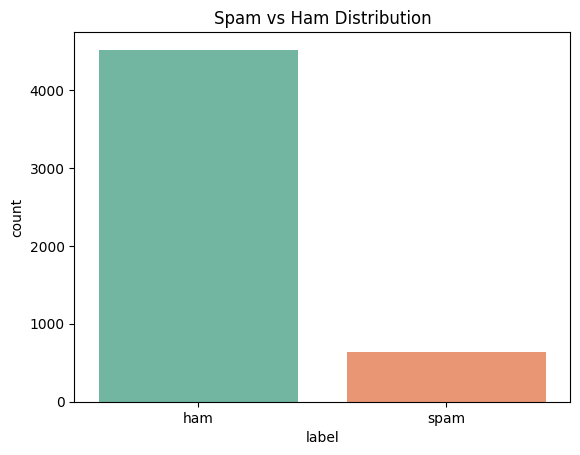

In [ ]:
print(df['label'].value_counts())

sns.countplot(x=df['label'], palette="Set2")
plt.title("Spam vs Ham Distribution")
plt.show()


Average ham length: 70.42294065544729
Average spam length: 137.59190031152647


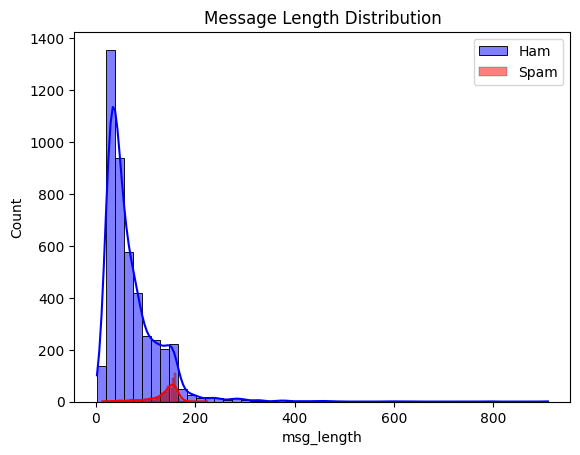

In [ ]:
df['msg_length'] = df['message'].apply(len)

print("Average ham length:", df[df['label']=='ham']['msg_length'].mean())
print("Average spam length:", df[df['label']=='spam']['msg_length'].mean())

# Plot distribution
sns.histplot(df[df['label']=='ham']['msg_length'], bins=50, color='blue', label='Ham', kde=True)
sns.histplot(df[df['label']=='spam']['msg_length'], bins=50, color='red', label='Spam', kde=True)
plt.legend()
plt.title("Message Length Distribution")
plt.show()


In [ ]:
import re
from collections import Counter

def tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)   # remove punctuation/numbers
    return text.split()

# Get word counts for spam
spam_words = df[df['label']=='spam']['message'].apply(tokenize).sum()
ham_words  = df[df['label']=='ham']['message'].apply(tokenize).sum()

print("Most common spam words:", Counter(spam_words).most_common(10))
print("Most common ham words:", Counter(ham_words).most_common(10))


Most common spam words: [('to', 579), ('a', 324), ('call', 299), ('you', 248), ('your', 236), ('free', 185), ('for', 182), ('the', 179), ('or', 156), ('now', 155)]
Most common ham words: [('i', 2075), ('you', 1773), ('to', 1474), ('the', 1048), ('a', 960), ('u', 890), ('and', 818), ('in', 753), ('me', 712), ('my', 668)]


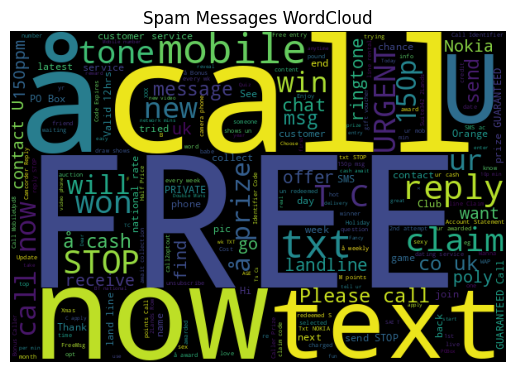

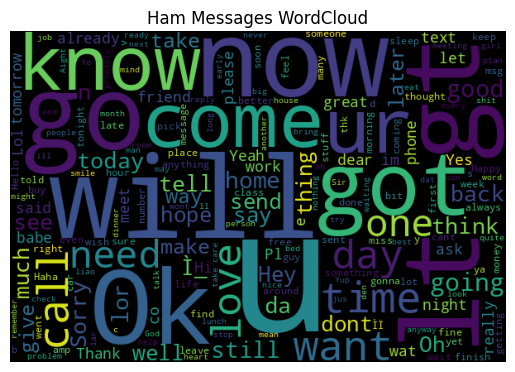

In [ ]:
# Spam WordCloud
spam_wc = WordCloud(width=600, height=400, background_color='black').generate(" ".join(df[df['label']=='spam']['message']))
plt.imshow(spam_wc)
plt.axis("off")
plt.title("Spam Messages WordCloud")
plt.show()

# Ham WordCloud
ham_wc = WordCloud(width=600, height=400, background_color='black').generate(" ".join(df[df['label']=='ham']['message']))
plt.imshow(ham_wc)
plt.axis("off")
plt.title("Ham Messages WordCloud")
plt.show()


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download resources (run once)
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def clean_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation/numbers
    text = re.sub(r'[^a-z]', ' ', text)

    # 3. Tokenize
    words = text.split()

    # 4. Remove stopwords + Lemmatize
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]

    # 5. Join back to string
    return " ".join(words)


In [ ]:
df = pd.read_csv("spam_cleaned.csv")

# Apply cleaning
df['clean_message'] = df['message'].apply(clean_text)

# Compare original vs cleaned
print(df[['message', 'clean_message']].head(10))



                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   
5  FreeMsg Hey there darling it's been 3 week's n...   
6  Even my brother is not like to speak with me. ...   
7  As per your request 'Melle Melle (Oru Minnamin...   
8  WINNER!! As a valued network customer you have...   
9  Had your mobile 11 months or more? U R entitle...   

                                       clean_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4                nah think go usf life around though  
5  freemsg hey darling week word back like fun st... 

In [ ]:
df.to_csv("spam_preprocessed.csv", index=False, encoding="utf-8")


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [ ]:
# Use only cleaned messages
X_text = df['clean_message']
y = df['target']

# Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=3000)  # limit vocab size
X = tfidf.fit_transform(X_text).toarray()

print("Shape of TF-IDF matrix:", X.shape)


Shape of TF-IDF matrix: (5158, 3000)


In [ ]:
print("Vocabulary size:", len(tfidf.get_feature_names_out()))

sample = df['clean_message'].iloc[0]
print("Sample message:", sample)

vector = tfidf.transform([sample]).toarray()
print("Vector shape:", vector.shape)
print("First 20 features:", vector[0][:20])


Vocabulary size: 3000
Sample message: go jurong point crazy available bugis n great world la e buffet cine got amore wat
Vector shape: (1, 3000)
First 20 features: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
import joblib
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (4126, 3000)
Testing set shape: (1032, 3000)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Initialize model
nb_model = MultinomialNB()

# Train on training data
nb_model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
y_pred = nb_model.predict(X_test)
print(y_pred)


[0 0 0 ... 1 0 0]


In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9718992248062015

Classification Report:
               precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       904
        Spam       0.96      0.80      0.88       128

    accuracy                           0.97      1032
   macro avg       0.97      0.90      0.93      1032
weighted avg       0.97      0.97      0.97      1032


Confusion Matrix:
 [[900   4]
 [ 25 103]]


In [32]:
import joblib

# Save trained model
joblib.dump(nb_model, "spam_classifier_nb.pkl")

# Save TF-IDF vectorizer (from Step 5)
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [33]:
# Load model and vectorizer
loaded_model = joblib.load("spam_classifier_nb.pkl")
loaded_tfidf = joblib.load("tfidf_vectorizer.pkl")

# Example new message
new_msg = ["Congratulations! You won a free lottery ticket, call now"]

# Convert using same vectorizer
new_msg_vec = loaded_tfidf.transform(new_msg)

# Predict
prediction = loaded_model.predict(new_msg_vec)
print("Prediction:", "Spam" if prediction[0] == 1 else "Ham")


Prediction: Ham


In [37]:
 # testing email is spam or not
 import joblib

# Load trained model + vectorizer
model = joblib.load("spam_classifier_nb.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")


In [38]:
new_email = ["Congratulations! You have won $1000. Claim now!!!"]


In [39]:
# Transform text into same format as training
new_email_vec = tfidf.transform(new_email)


In [40]:
prediction = model.predict(new_email_vec)[0]

if prediction == 1:
    print("🚨 Spam Email")
else:
    print("✅ Ham (Not Spam) Email")


🚨 Spam Email


In [41]:
new_email = ["Hey, are we still meeting tomorrow for lunch?"]
